In [2]:
pip install --upgrade opencv-contrib-python


   ---------------------------------------- 0.0/46.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/46.2 MB ? eta -:--:--
    --------------------------------------- 0.8/46.2 MB 2.8 MB/s eta 0:00:17
   - -------------------------------------- 1.6/46.2 MB 3.5 MB/s eta 0:00:13
   -- ------------------------------------- 2.6/46.2 MB 3.8 MB/s eta 0:00:12
   -- ------------------------------------- 3.4/46.2 MB 3.7 MB/s eta 0:00:12
   --- ------------------------------------ 4.2/46.2 MB 3.8 MB/s eta 0:00:12
   ---- ----------------------------------- 5.0/46.2 MB 3.8 MB/s eta 0:00:11
   ----- ---------------------------------- 6.0/46.2 MB 3.9 MB/s eta 0:00:11
   ----- ---------------------------------- 6.8/46.2 MB 4.0 MB/s eta 0:00:10
   ------ --------------------------------- 7.9/46.2 MB 4.1 MB/s eta 0:00:10
   ------- -------------------------------- 8.9/46.2 MB 4.2 MB/s eta 0:00:09
   -------- ------------------------------- 9.7/46.2 MB 4.2 MB/s eta 0:00:09
   --------- 

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Zeynep\\anaconda3\\envs\\cmp_torch\\Lib\\site-packages\\cv2\\cv2.pyd'
Consider using the `--user` option or check the permissions.



In [2]:
pip install --upgrade --force-reinstall opencv-contrib-python --user


  Using cached opencv_contrib_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached numpy-2.0.2-cp39-cp39-win_amd64.whl.metadata (59 kB)
Using cached opencv_contrib_python-4.11.0.86-cp37-abi3-win_amd64.whl (46.2 MB)
Using cached numpy-2.0.2-cp39-cp39-win_amd64.whl (15.9 MB)
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
import cv2

# 1. LapSRN modelini yükle
sr = cv2.dnn_superres.DnnSuperResImpl_create()
sr.readModel("models/LapSRN_x4.pb")  # Model dosyan burada olacak
sr.setModel("lapsrn", 4)  # model adı ve büyütme oranı

# 2. Görseli oku
image = cv2.imread("all tissue img/human_bladder_01.png")

# 3. Super-Resolution uygula
result = sr.upsample(image)

# 4. SR çıktısını göster
cv2.imshow("Super-Resolved Output", result)
cv2.waitKey(0)
cv2.destroyAllWindows()


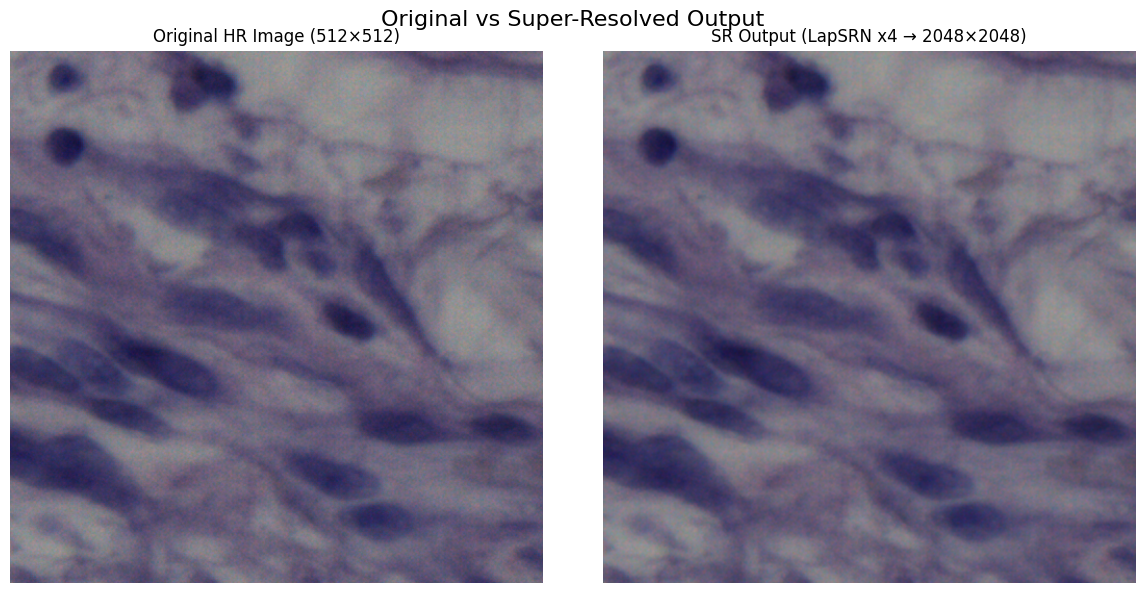

In [7]:
import cv2
import matplotlib.pyplot as plt

# 1. LapSRN modelini yükle
sr = cv2.dnn_superres.DnnSuperResImpl_create()
sr.readModel("models/LapSRN_x4.pb")
sr.setModel("lapsrn", 4)

# 2. Görseli oku
image = cv2.imread("all tissue img/human_bladder_01.png")

# 3. Super-Resolution uygula
result = sr.upsample(image)

# 4. BGR'den RGB'ye çevir (cv2 → plt için)
result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
hr = cv2.imread("all tissue img/human_bladder_01.png")
hr_rgb = cv2.cvtColor(hr, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(hr_rgb)
plt.title("Original HR Image (512×512)")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(result_rgb)
plt.title("SR Output (LapSRN x4 → 2048×2048)")
plt.axis("off")

plt.suptitle("Original vs Super-Resolved Output", fontsize=16)
plt.tight_layout()
plt.show()

In [8]:
from skimage.metrics import peak_signal_noise_ratio, structural_similarity
import numpy as np
import cv2

# 1. SR ve HR görselleri RGB ve float32 [0,1] formatına çevir
sr_norm = result_rgb.astype(np.float32) / 255.0

hr = cv2.imread("all tissue img/human_bladder_01.png")
hr_rgb = cv2.cvtColor(hr, cv2.COLOR_BGR2RGB)

# 2. HR görüntüyü SR boyutuna resize et
h, w, _ = result_rgb.shape  # SR boyutları
hr_resized = cv2.resize(hr_rgb, (w, h), interpolation=cv2.INTER_CUBIC)

hr_norm = hr_resized.astype(np.float32) / 255.0

# 3. PSNR & SSIM hesapla
psnr = peak_signal_noise_ratio(hr_norm, sr_norm, data_range=1.0)
ssim = structural_similarity(hr_norm, sr_norm, channel_axis=2, data_range=1.0)

print(f"🔍 PSNR: {psnr:.2f} dB")
print(f"🔍 SSIM: {ssim:.4f}")


🔍 PSNR: 44.48 dB
🔍 SSIM: 0.9814
